In [2]:
!pip install keras==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.12.0 which is incompatible.


In [1]:
import numpy as np

from tensorflow import keras
from keras.constraints import max_norm
from keras.utils import np_utils

# datasests
from keras.datasets import cifar10


# display the image
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess
from sklearn.preprocessing import OneHotEncoder

# for model
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization

from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

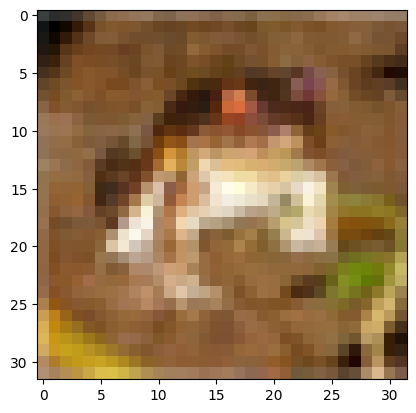

[6]


In [5]:
plt.imshow(X_train[0])
plt.show()
print(y_train[0])

In [6]:
# Normalize th input from 0-255 to between 0 and 1 by dividing by 255

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
# one-hot encoding output

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
## Building the Model

model = Sequential()
# Feature Extraction
model.add(Conv2D(32, (3,3), padding = 'same', input_shape= X_train.shape[1:], activation = 'relu'))
model.add(Dropout(0.2)) # 20% of turn it off Nouron
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2))
# turn 2D into 1D
model.add(Flatten())
model.add(Dropout(0.2))
model.add(BatchNormalization())
# Fully connected layer
model.add(Dense(32, activation='relu'))
# last layer most be number of the classes
model.add(Dense(10, activation='softmax')) # soft max is probability of output between 0 and 1

In [11]:
# complie model

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [13]:
# training the model

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30, batch_size= 64)

Epoch 1/30
782/782 [==============================] - 25s 14ms/step - loss: 1.4998 - accuracy: 0.4642 - val_loss: 1.1509 - val_accuracy: 0.5869
Epoch 2/30
782/782 [==============================] - 10s 12ms/step - loss: 1.0614 - accuracy: 0.6227 - val_loss: 1.0697 - val_accuracy: 0.6274
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8822 - accuracy: 0.6901 - val_loss: 0.9114 - val_accuracy: 0.6891
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7843 - accuracy: 0.7241 - val_loss: 0.7717 - val_accuracy: 0.7346
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7239 - accuracy: 0.7440 - val_loss: 0.7224 - val_accuracy: 0.7538
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.6716 - accuracy: 0.7627 - val_loss: 0.6833 - val_accuracy: 0.7576
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.6366 - accuracy: 0.7758 - val_loss: 0.6361 - val_accuracy:

In [14]:
for key, val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


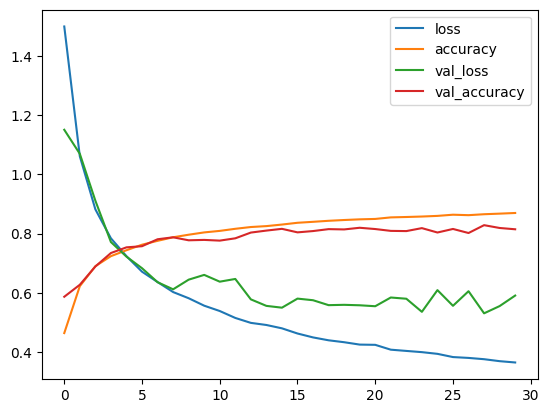

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.show()

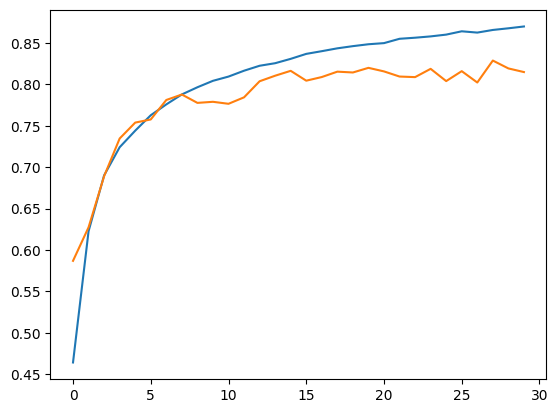

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [19]:
# after complite training save the model
model.save('cifar10_model.h5')